In [19]:
import pandas as pd
import numpy as num
from sklearn.model_selection import train_test_split
from google.colab import files
import matplotlib.pyplot as plt

In [20]:
uploaded=files.upload()

Saving cloudpredictionsystemproject.csv to cloudpredictionsystemproject (1).csv


In [21]:
df=pd.read_csv("/content/cloudpredictionsystemproject.csv")

In [22]:
df.shape

(145460, 23)

In [23]:
df.columns.tolist()

['Date',
 'Location',
 'MinimumTemperature',
 'MaximumTemperature',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDirection',
 'WindGustSpeed',
 'WindDirection9am',
 'WindDirection3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temperature9am',
 'Temperature3pm',
 'CloudBurst Today',
 'CloudBurstTomorrow']

In [24]:
df.head()

,Date,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [25]:
#conversion of the target to 0s and 1s
def to_binary(series):
    s = series.astype(str).str.strip().str.lower()
    return s.map(lambda x: 1 if x in ["yes","y","1","true","t"]
                 else 0 if x in ["no","n","0","false","f"]
                 else np.nan)
target_col = "CloudBurstTomorrow"
df["target"] = to_binary(df[target_col])
df = df[df["target"].notna()].copy()
print("Target distribution (0 = No, 1 = Yes):")
print(df["target"].value_counts())
X = df.drop(columns=[target_col, "target"])
y = df["target"]
print("\nFeature shape:", X.shape)
print("Target shape:", y.shape)

Target distribution (0 = No, 1 = Yes):
target
0.0    110316
1.0     31877
Name: count, dtype: int64

Feature shape: (142193, 22)
Target shape: (142193,)


In [26]:
#pipline
from sklearn.impute import SimpleImputer
X_num = X.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X_num)
X_prepared = pd.DataFrame(X_imputed, columns=X_num.columns)
print("Final feature shape:", X_prepared.shape)
X_prepared.head()

Final feature shape: (142193, 16)


,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [27]:
#real_part testing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split( X_prepared, y, test_size=0.2, random_state=42, stratify=y )
print("Train size:", X_train.shape, " Test size:", X_test.shape)
rf = RandomForestClassifier( n_estimators=200, class_weight="balanced", random_state=42 )
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_proba))

Train size: (113754, 16)  Test size: (28439, 16)

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8647    0.9593    0.9095     22064
         1.0     0.7733    0.4805    0.5927      6375

    accuracy                         0.8520     28439
   macro avg     0.8190    0.7199    0.7511     28439
weighted avg     0.8442    0.8520    0.8385     28439


Confusion Matrix:
[[21166   898]
 [ 3312  3063]]

ROC AUC: 0.8829294458900313


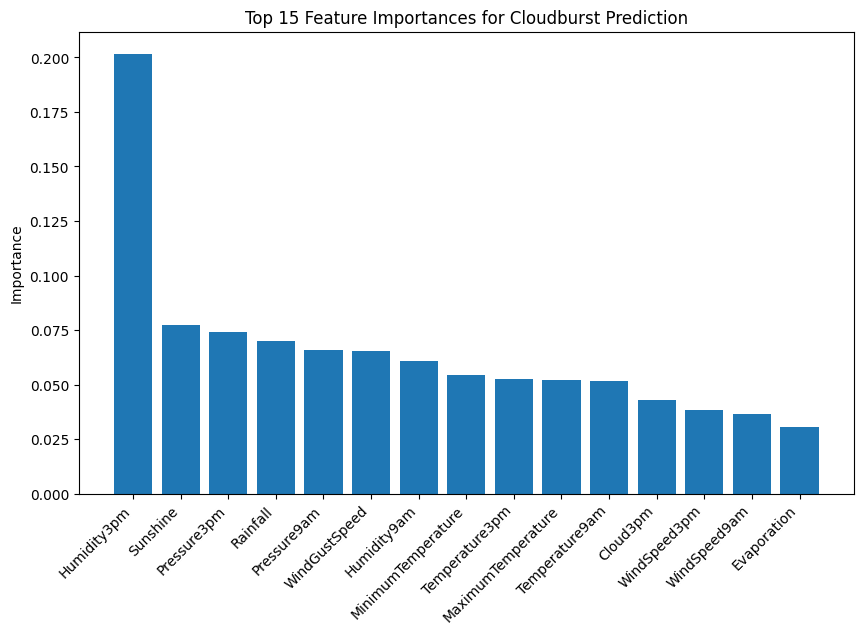

In [28]:
importances = rf.feature_importances_
features = X_prepared.columns
indices = importances.argsort()[::-1]
plt.figure(figsize=(10,6))
plt.bar(range(15), importances[indices[:15]], align="center")
plt.xticks(range(15), [features[i] for i in indices[:15]], rotation=45, ha="right")
plt.ylabel("Importance")
plt.title("Top 15 Feature Importances for Cloudburst Prediction")
plt.show()

Top 10 Features influencing cloudburst prediction:


,Feature,Importance
9,Humidity3pm,0.201741
4,Sunshine,0.077361
11,Pressure3pm,0.073946
2,Rainfall,0.069957
10,Pressure9am,0.065707
5,WindGustSpeed,0.065338
8,Humidity9am,0.060598
0,MinimumTemperature,0.054469
15,Temperature3pm,0.052742
1,MaximumTemperature,0.052125


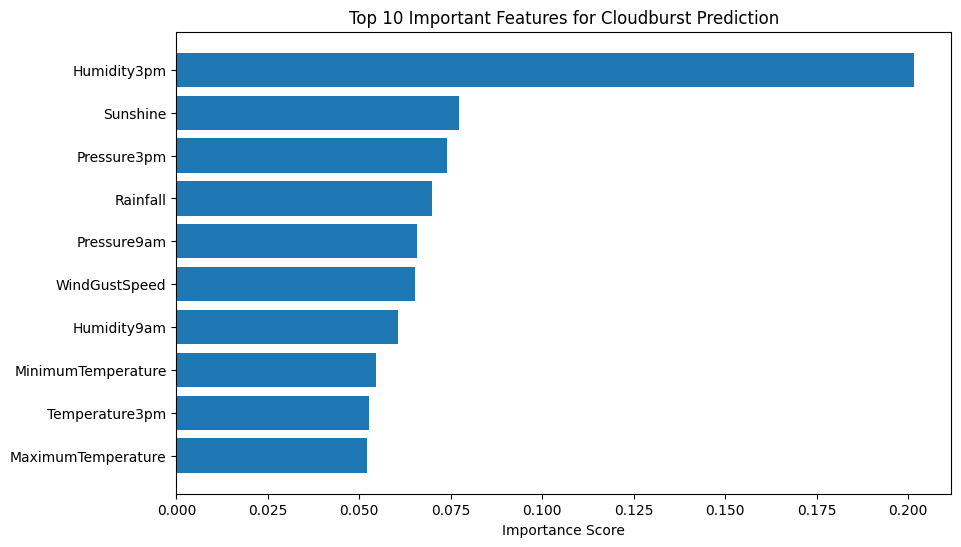

In [29]:
#feature ke importance
importances = rf.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": X_prepared.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print("Top 10 Features influencing cloudburst prediction:")
display(feat_imp.head(10))
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feat_imp["Feature"].head(10), feat_imp["Importance"].head(10))
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 10 Important Features for Cloudburst Prediction")
plt.show()

In [30]:
import joblib
joblib.dump(rf, "cloudburst_rf_model.pkl")
feat_imp.to_csv("feature_importances.csv", index=False)
print(" Model and feature importances saved!")
loaded_model = joblib.load("cloudburst_rf_model.pkl")
sample = X_test.iloc[:5]
print("\nSample Predictions:", loaded_model.predict(sample))
print("Actual Labels:     ", y_test.iloc[:5].tolist())


 Model and feature importances saved!

Sample Predictions: [0. 1. 0. 0. 0.]
Actual Labels:      [0.0, 1.0, 0.0, 0.0, 0.0]


In [31]:
#prediction and testing
import numpy as np
import pandas as pd
def predict_cloudburst(new_data, model, imputer, feature_columns):
    df_new = pd.DataFrame([new_data])
    df_new = df_new.reindex(columns=feature_columns, fill_value=np.nan)
    X_new = imputer.transform(df_new)
    pred = model.predict(X_new)[0]
    proba = model.predict_proba(X_new)[0,1]

    return pred, proba

# testing area (test ke liye change kr dena )
example_weather = {
    "Temperature3pm": 29,
    "Humidity": 75,
    "Rainfall": 12,
    "Pressure": 1005
}
pred, proba = predict_cloudburst(example_weather, rf, imputer, X_prepared.columns)
print("Prediction:", "Cloudburst" if pred==1 else "No Cloudburst")
print("Probability of cloudburst:", round(proba, 3))


Prediction: No Cloudburst
Probability of cloudburst: 0.42


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [32]:
# last picle file download krne ke liye
from google.colab import files
files.download("cloudburst_rf_model.pkl")
files.download("feature_importances.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>